In [5]:
# --- Cell 1: Imports ---
import os
import cv2
import matplotlib.pyplot as plt
import random








In [6]:
# --- Cell 2: Define paths ---
base_dir = "output_sam_yolo_notebook"  # change if your directory name is different
images_dir = os.path.join(base_dir, "images")
labels_dir = os.path.join(base_dir, "labels")
classes_file = os.path.join(base_dir, "classes.txt")

# --- Cell 3: Load class names ---
with open(classes_file, "r") as f:
    class_names = [line.strip() for line in f.readlines()]

print("Classes:", class_names)

Classes: ['Common leopard', 'Himalayan goral', 'Himalayan gray langur', 'People', 'Rhesus macaque']


In [7]:
# --- Cell 4: Define function to draw bounding boxes ---
def draw_yolo_bboxes(image_path, label_path, class_names):
    # Read image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Could not read image: {image_path}")
        return None
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, _ = image.shape

    # Read label file
    if not os.path.exists(label_path):
        print(f"No label file found for {os.path.basename(image_path)}")
        return image

    with open(label_path, "r") as f:
        lines = f.readlines()

    # Draw each bounding box
    for line in lines:
        parts = line.strip().split()
        cls_id, x_center, y_center, box_w, box_h = map(float, parts)
        cls_id = int(cls_id)
        
        # Convert from normalized YOLO format to pixel coordinates
        x1 = int((x_center - box_w / 2) * w)
        y1 = int((y_center - box_h / 2) * h)
        x2 = int((x_center + box_w / 2) * w)
        y2 = int((y_center + box_h / 2) * h)
        
        # Draw rectangle and label
        color = (255, 0, 0)  # purple in BGR
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        label = f"{class_names[cls_id]}" if cls_id < len(class_names) else str(cls_id)
        cv2.putText(image, label, (x1, max(y1 - 10, 0)), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, color, 4, cv2.LINE_AA)  # bigger font and thicker text
    
    return image


In [ ]:
# --- Cell 5: Visualize a few images ---
# sample_images = os.listdir(images_dir)[:5]  # change the slice to view more or randomize
sample_images = random.sample(os.listdir(images_dir), 20)  # uncomment for random samples

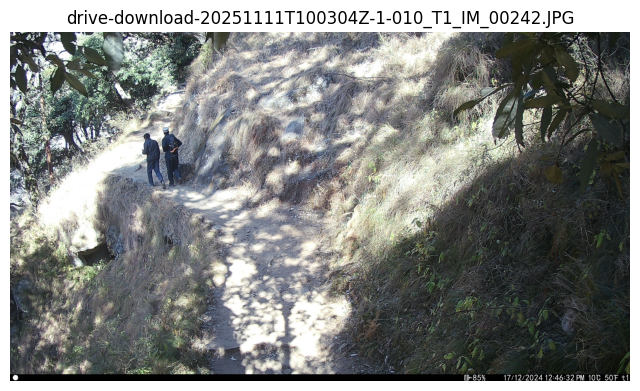

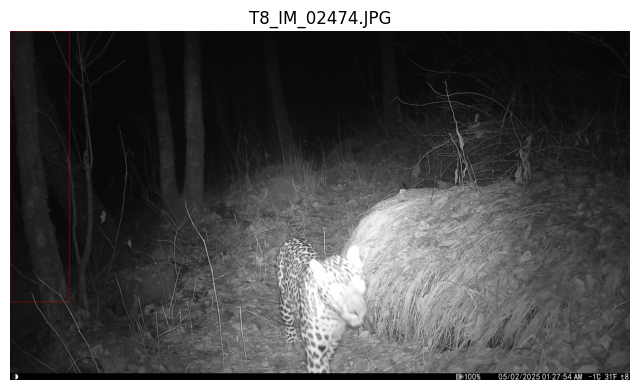

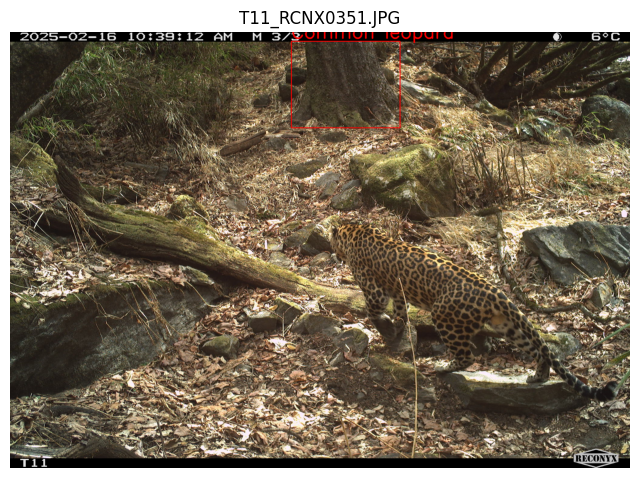

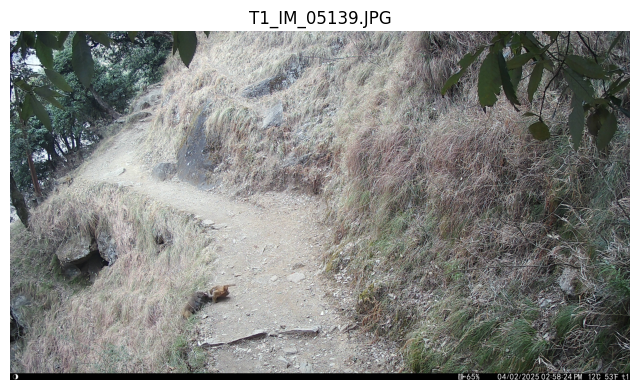

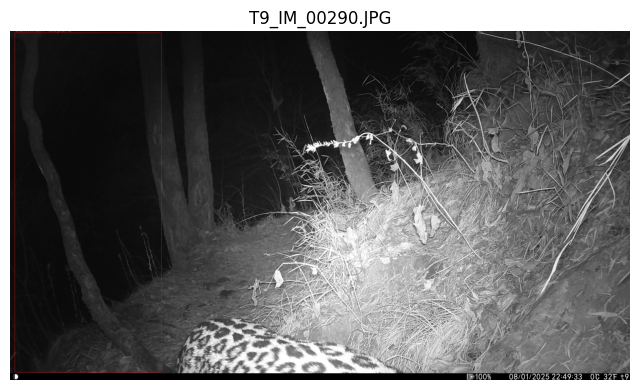

In [9]:

for img_name in sample_images:
    image_path = os.path.join(images_dir, img_name)
    label_path = os.path.join(labels_dir, os.path.splitext(img_name)[0] + ".txt")
    
    output_image = draw_yolo_bboxes(image_path, label_path, class_names)
    if output_image is not None:
        plt.figure(figsize=(8, 8))
        plt.imshow(output_image)
        plt.title(img_name)
        plt.axis("off")
        plt.show()